In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats

In [2]:
labels = ['<500', '<1000', '<1500', '<2000', '<2500', '<3000','<3500','<4000','<4500','<5000','<5500','<6000','<6500', '<7000', '<7500','<8000']
xpos = np.arange(350,8000,500)

In [3]:
with open("SGC_results.json") as file:
    results_sgc = json.load(file)

In [4]:
control_results = {"neuron_counts": [],
                  "neuron_counts_mean":[],
                  "neuron_sizes": []}
patient_results = {"neuron_counts": [],
                  "neuron_counts_mean":[],
                  "neuron_sizes": []}
for result in results_sgc:
    if "control" in result["path"] and "4" not in result["path"]:
        for nf_sizes in result["neuronal_cell_sizes"]:
            nf_sizes = np.array(nf_sizes)
            nf_sizes[nf_sizes>8000] = 8000
            #nf_sizes[nf_sizes<200] = 200
            counts, bins = np.histogram(nf_sizes, bins=16, range=(0,8000))
            counts_percent = counts/counts.sum()*100
            control_results["neuron_counts"].append(counts_percent)    
        control_results["neuron_counts_mean"] = np.mean(control_results["neuron_counts"], axis = 0)
    elif "patient" in result["path"]:
        for nf_sizes in result["neuronal_cell_sizes"]:
            nf_sizes = np.array(nf_sizes)
            nf_sizes[nf_sizes>8000] = 8000
            #nf_sizes[nf_sizes<200] = 200
            counts, bins = np.histogram(nf_sizes, bins=16, range=(0,8000))
            counts_percent = counts/counts.sum()*100
            patient_results["neuron_counts"].append(counts_percent)    
        patient_results["neuron_counts_mean"] = np.mean(patient_results["neuron_counts"], axis = 0)  

In [5]:
df_control_sgc = pd.DataFrame(control_results['neuron_counts'])
df_control_sgc.columns = bins[1:]
df_patient_sgc = pd.DataFrame(patient_results['neuron_counts'])
df_patient_sgc.columns = bins[1:]

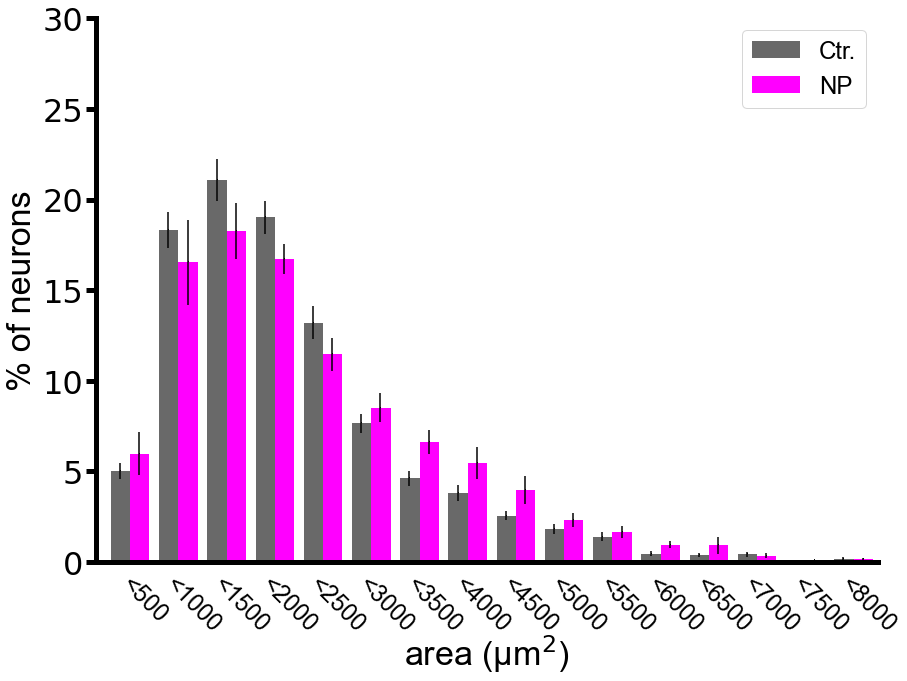

In [6]:
plt.figure(figsize=(14,10))
plt.hist([bins[:-1], bins[:-1]], bins, 
         weights=[control_results["neuron_counts_mean"], patient_results["neuron_counts_mean"]], color=['dimgray', 'magenta'])

plt.errorbar(bins[:-1]+145, control_results["neuron_counts_mean"], color='k', fmt=',', yerr=stats.sem(df_control_sgc))
plt.errorbar(bins[:-1]+345, patient_results["neuron_counts_mean"], color='k', fmt=',', yerr=stats.sem(df_patient_sgc))

plt.rc('font',family='Arial')
plt.legend(['Ctr.', 'NP'], fontsize=24)
plt.xlim(-100,8000)
plt.ylim(0,30)
linewidth = 5
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth, bottom=False)
plt.yticks(fontsize=32)

for label, x in zip(labels, xpos):
    plt.annotate(label, xy=(x+50, 0), xycoords=('data', 'axes fraction'),
    xytext=(0, -10), textcoords='offset points', va='top', ha='center', fontsize=24, rotation=-45)

plt.xticks(visible=False)    
plt.ylabel('% of neurons', fontsize=34, fontname='Arial')
plt.xlabel('area (µm$^2$)', fontsize=34, labelpad=70, fontname='Arial')
plt.savefig('Histogramm neurons SGC images exclude.png', bbox_inches = "tight")
plt.show()